In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [22]:
lum_file = './parsec.dat'
lum_list = np.loadtxt(lum_file)
print(lum_list.shape[0])

final_file = '../luminosities/parsec_V.dat'

# For m_list, is the stellar initial mass. For z_list, is the stellar initial metallicity. For t_list, is the stellar age. For l_list, is the luminosity.
m_list = np.arange(0.01, 350, 0.01)
z_list = np.arange(0.002, 0.03, 0.002)
l_list = np.zeros((len(m_list), len(z_list)))

3830


In [3]:
with open(lum_file, 'r') as l:
    titles = []
    for i,line in enumerate(l.readlines()):
        if len(line.split()) == len(lum_list[0])+1 and line[0] == '#':
            titles.append(line)

for i in range(len(titles)-1):
    if titles[i] != titles[i+1]:
        print('?????')

In [4]:
print(titles[0].split())

['#', 'Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2', 'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag', 'Umag', 'Bmag', 'Vmag', 'Rmag', 'Imag', 'Jmag', 'Hmag', 'Kmag']


In [5]:
title = titles[0].split()[1:]
title_dict = {
    'Z' : title.index('Zini'),
    'M' : title.index('Mini'),
#    'U' : title.index('Umag'),
#    'B' : title.index('Vmag'),
    'V' : title.index('Vmag'),
#    'R' : title.index('Rmag'),
#    'I' : title.index('Imag'),
#    'J' : title.index('Jmag'),
#    'H' : title.index('Hmag'),
#    'K' : title.index('Kmag'),
}
idx_list = list(title_dict.values())

In [6]:
luminosities = []
for i_line in range(len(lum_list)):
    line = []
    for i_idx in idx_list:
        line.append(lum_list[i_line,i_idx])
    luminosities.append(line)

luminosities = np.array(luminosities)

Text(0, 0.5, 'L$_K$(mag)')

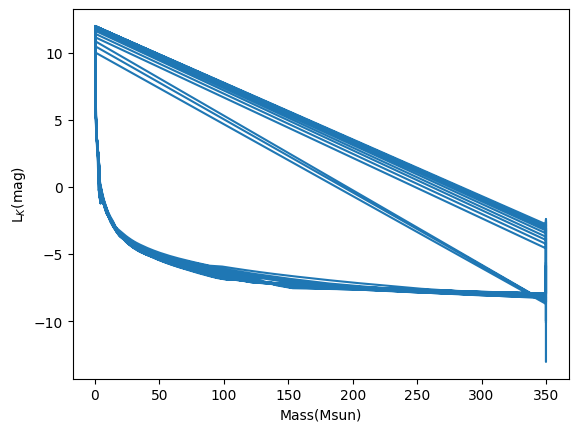

In [7]:
from matplotlib import pyplot as plt
plt.plot(luminosities[:,1], luminosities[:,-1])
plt.xlabel('Mass(Msun)')
plt.ylabel(r'L$_K$(mag)')

In [8]:
# sort the list by Z from low to high, M from low to high, t from high to low order to sort the list.
key = np.lexsort((luminosities[:,1], luminosities[:,0]))
sorted_luminosities = luminosities[key]
print(sorted_luminosities[:,1])

[9.00000036e-02 9.91803259e-02 1.17540978e-01 ... 3.50004730e+02
 3.50004761e+02 3.50004791e+02]


In [9]:
original_z = np.unique(sorted_luminosities[:,0])
print(original_z)


[0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022 0.024
 0.026 0.028]


In [10]:
# interpolation of the list. All linearly interpolated.
mag_list = np.zeros((len(z_list),len(m_list)))
for i_z, z in enumerate(z_list):
    idx_list = []
    masses = []
    mags = []
    for j in range(len(sorted_luminosities)):
        if sorted_luminosities[j,0]-z < 0.000002 and sorted_luminosities[j,0]-z > -0.000002:
            idx_list.append(j)
            masses.append(sorted_luminosities[j,1])
            mags.append(sorted_luminosities[j,2])
    mag_list[i_z,:] = np.interp(m_list, masses, mags)

In [11]:
l_list = np.power(10, mag_list/(-2.5))

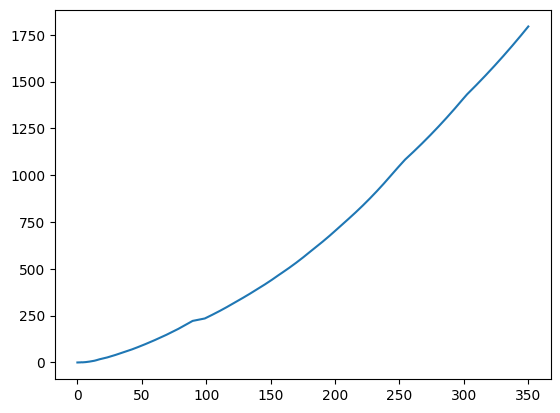

In [12]:
plt.plot(m_list, l_list[0,:])

In [16]:
final_list = np.zeros((len(z_list)+1, len(m_list)+1))
final_list[1:,1:] = l_list
final_list[0,1:] = m_list
final_list[1:,0] = z_list
np.savetxt(final_file, final_list)

In [17]:
print(z_list)

[0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022 0.024
 0.026 0.028]


In [34]:
lifetime_table = 'life_schaller_92.txt'
file_name = '../lifes/life_schaller_92.txt'
# input the life time of the stars 
lifetimes = np.loadtxt(lifetime_table)

life_m   = lifetimes[:,1]
life_z   = lifetimes[:,2]
life     = lifetimes[:,5]
life_md  = lifetimes[:,3]

# md is mass loss in post-Main Sequence: 1 for standard mass loss rate, 2 for model with twice the standard mass loss rate
life_m_new = []
life_z_new = []
life_new   = []
for i in range(0, len(life)):
    if life_md[i] == 1:
        life_m_new.append(life_m[i])
        life_z_new.append(life_z[i])
        life_new.append(life[i])

life_m = life_m_new
life_z = life_z_new
life   = life_new

all_z    = []
for z in life_z:
    if not z in all_z:
        all_z.append(z)

all_m    = []
for m in life_m:
    if not m in all_m:
        all_m.append(m)

print(all_z)
print(all_m)

s_life   = np.zeros((len(all_m),len(all_z)))
former_m = life_m[0]
former_z = life_z[0]
i_m = 0 
i_z = 0 
for n in range(0,len(life)):
    if life_m[n] != former_m or life_z[n] != former_z:
        if life_m[n] != former_m:
            i_m += 1
            former_m = life_m[n]
        if life_z[n] != former_z:
            i_z += 1
            former_z = life_z[n]
            i_m = 0
            former_m = life_m[0]
        s_life[i_m][i_z] = life[n]
    else:
        if life[n] > s_life[i_m][i_z]:
            s_life[i_m][i_z] = life[n]

# the order of the list is different with the list of stellar yield
# So this part is to order the list
s_life_1 = np.zeros((len(all_m),len(all_z)))
all_m_new = np.zeros(len(all_m)) 
for i in range(0,len(all_m)):
    s_life_1[len(all_m)-i-1,:] = s_life[i,:]
    all_m_new[len(all_m)-i-1] = all_m[i]

all_m = all_m_new

s_m_life = np.zeros((len(m_list), len(all_z)))
for iz in range(len(all_z)):
    s_m_life[:,iz] = 10**np.interp(m_list, all_m, np.log10(s_life_1[:,iz]))

s_life_3 = np.zeros((len(m_list), len(z_list)))
for im in range(len(m_list)):
    s_life_3[im,:] = 10**np.interp(z_list, all_z, np.log10(s_m_life[im,:]))

# def define_m_life(m,i_z):
#     if m in all_m:
#         for i_m, mass in enumerate(all_m):
#             if mass == m:
#                 life = s_life_1[i_m,i_z]
#                 return life
#     else:
#         for i_m in range(0,len(all_m)-1):
#             if all_m[i_m] < m and all_m[i_m+1] > m:
#                 a_m = (np.log10(s_life_1[i_m+1,i_z])-np.log10(s_life_1[i_m,i_z]))/(np.log10(all_m[i_m+1])-np.log10(all_m[i_m]))
#                 b_m = np.log10(s_life_1[i_m,i_z])-a_m*np.log10(all_m[i_m])
#                 life = 10**(a_m*np.log10(m)+b_m)
#                 return life
# 
# # First, interpolate the mass:
# s_life_2 = np.zeros((len(m_list),len(all_z)))
# for i in range(0,len(all_z)):
#     for j,m in enumerate(m_list):
#         s_life_2[j,i] = define_m_life(m,i)
# # print(all_z)
# # print(all_m)
# 
# def define_z_life(i_m,z):
#     if z in all_z:
#         for i_z,met in enumerate(all_z):
#             if z == met:
#                 life = s_life_2[i_m,i_z]
#                 return life
#     else:
#         if z > all_z[0]:
#             life = s_life_2[i_m, 0]
#         elif z < all_z[-1]:
#             life = s_life_2[i_m, -1]
#         else:
#             for i_z in range(0,len(all_z)-1):
#                 if all_z[i_z] > z and all_z[i_z+1] < z:
#                     a_z = (np.log10(s_life_2[i_m,i_z+1])-np.log10(s_life_2[i_m,i_z]))/(np.log10(all_z[i_z+1])-np.log10(all_z[i_z]))
#                     b_z = np.log10(s_life_2[i_m,i_z])-a_z*np.log10(all_z[i_z])
#                     life = 10**(a_z*np.log10(z)+b_z)
#         return life
# 
# # Then, interpolate the metallicity
# s_life_3 = np.zeros((len(m_list),len(z_list)))
# for i in range(0,len(m_list)):
#     for j,z in enumerate(z_list):
#         s_life_3[i,j] = define_z_life(i,z)

life_list = s_life_3
final_list = np.zeros((len(m_list)+1, len(z_list)+1))
final_list[1:,1:] = life_list
final_list[0,1:] = z_list
final_list[1:,0] = m_list
np.savetxt(file_name, final_list)


[0.02, 0.001]
[120.0, 85.0, 60.0, 40.0, 25.0, 20.0, 15.0, 12.0, 9.0, 7.0, 5.0, 4.0, 3.0, 2.5, 2.0, 1.7, 1.5, 1.25, 1.0, 0.9, 0.8]
